# Task No 1
# Dataset Exploration with Pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### 1. Load Dataset
- Loading the dataset iris from the sns library.

In [2]:
df = sns.load_dataset('iris')

### 2. Display Column Names
- View all column names to understand the available features.

In [3]:
df.columns 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

- Columns:  Sepal Length, Petal Length, Sepal Width, Petal Width , species
- Helps understand the available features.

### 3. Number of Rows
- Check the number of rows and columns to understand the dataset size.

In [4]:
df.shape

(150, 5)

- Dataset shape: 150 rows, 5 columns
- Knowing dataset size helps plan analysis.

### 4. Data Types
- Examine the data type of each column (e.g., integer, float, object) to determine suitable analysis methods.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 5. Summary Statistics
- Generate summary statistics for numerical columns to understand the distribution of values (mean, median, standard deviation, min, max, quartiles).

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


- Numerical summary (example): 
  - sepal_length: mean ≈ 5.84, min = 4.3, max = 7.9
  - sepal_length: mean ≈ 3.05, min = 2.0, max = 4.4
  - sepal_length: mean ≈ 3.75, min = 1.0, max = 6.9
  - sepal_length: mean ≈ 1.19, min = 0.1, max = 2.5
    
- Helps detect outliers and distribution patterns.

### Goal
- Understood the data structure.
- Prepared for further analysis or modeling.

# Task No 2

## Clean a Dataset with Missing and Categorical Data


### 1. Understanding data and Check Missing Values
- Identify missing or null values to detect data cleaning requirements.

In [7]:
df = sns.load_dataset("titanic")

In [8]:
df.shape

(891, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
df.isna().sum()/df.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

- Age → 177 missing
- Deck → 688 missing
- Embarked → 2 missing
- Important for data cleaning and preprocessing.

### 2. Handle Missing Values


In [11]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df.drop("deck" , axis = 1 , inplace = True)

- **Age**: Filled missing values with the median.
- **Embarked**: Filled missing values with the mode (most frequent value).
- **Deck**: Dropped due to too many missing values.


### 3. Convert Categorical Columns to Numeric using lebal Encoding 

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
df['gender'] = df['sex'].map({'male': 0, 'female': 1})
df["embarked_numeric"] = df["embarked"].map({"S":0 , "C":1 , "Q":2})
df["class_numberic"] = df["class"].map({"First" : 1 , "Second":2 , "Third":3})


- **Sex**: male → 0, female → 1
- **Embarked**: S → 0, C → 1, Q → 2
- **Class**: First → 1 , Second → 2 , Third → 3

### Goal
- Learned how to clean missing data.
- Converted categorical variables to numeric.



# Task No 3

## Visualize Key Insights from Data

### 1. Plot Survival Rates by Gender
- Used seaborn countplot.

      sex  survived  Count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109


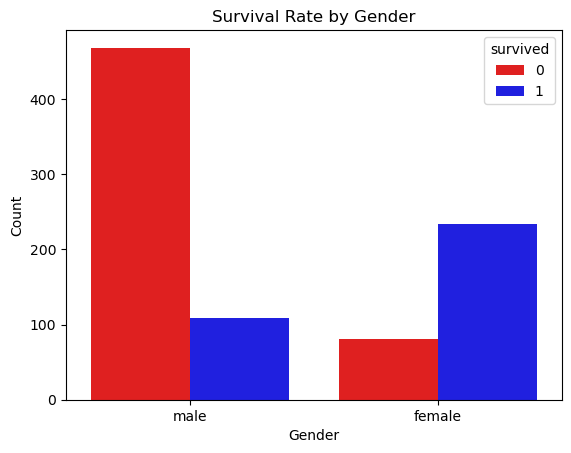

In [14]:
gender_survival_counts = df.groupby(['sex', 'survived']).size().reset_index(name='Count')
print(gender_survival_counts)

sns.countplot(x='sex', hue='survived', data=df , palette = {0: "red" , 1 :"blue"})
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()




- Findings:
  - Female passengers had a higher survival rate than male passengers.

### 2. Plot Survival Rates by Class
- Used seaborn countplot.

C:\Users\Jam\AppData\Local\Temp\ipykernel_4388\4104256636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival_counts = df.groupby(['class', 'survived']).size().reset_index(name='Count')


    class  survived  Count
0   First         0     80
1   First         1    136
2  Second         0     97
3  Second         1     87
4   Third         0    372
5   Third         1    119


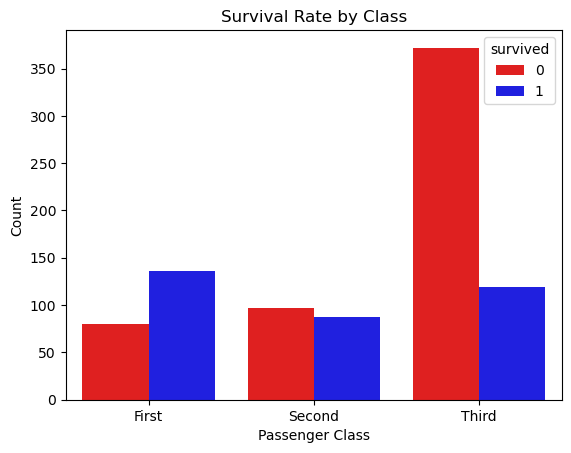

In [15]:
class_survival_counts = df.groupby(['class', 'survived']).size().reset_index(name='Count')
print(class_survival_counts)

sns.countplot(x='class', hue='survived', data=df , palette = {0: "red" , 1 :"blue"} )
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

- Findings:
  - Passengers in higher classes (first class) had a higher survival rate than lower classes.

### 3. PIE CHART: Passenger class distribution

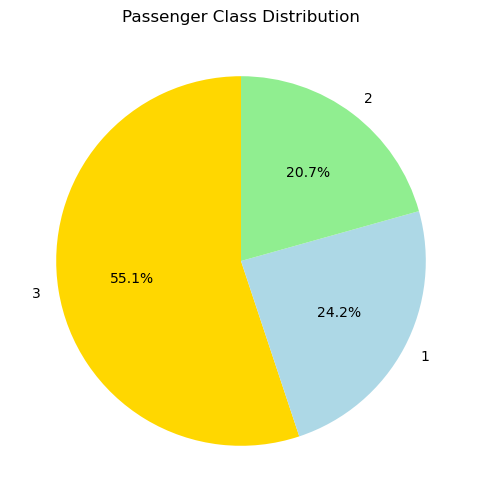

In [16]:
pclass_counts = df["pclass"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90, colors=["gold", "lightblue", "lightgreen"])
plt.title("Passenger Class Distribution")
plt.show()

- Findings
    - Most passengers were in 3rd class. 

### 4. HISTOGRAM: Age distribution

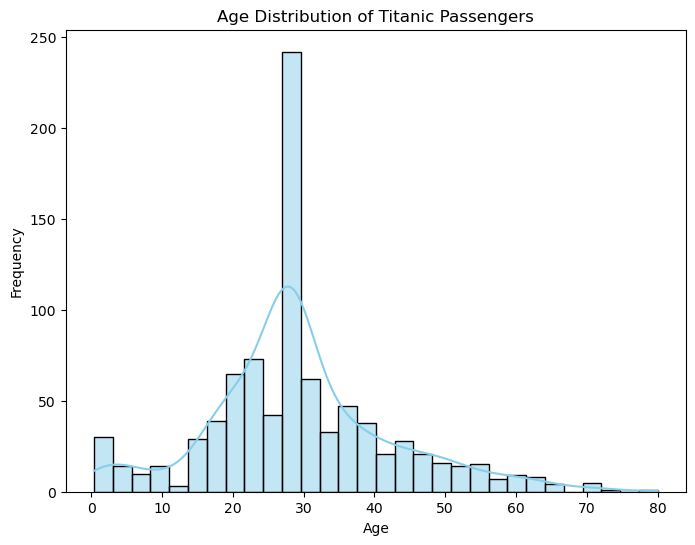

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df["age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- Findings
    - Majority of passengers were between 20–40 years old. 

### 5. BOXPLOT: Age by Class

C:\Users\Jam\AppData\Local\Temp\ipykernel_4388\120818853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pclass", y="age", data=df, palette="Set2")


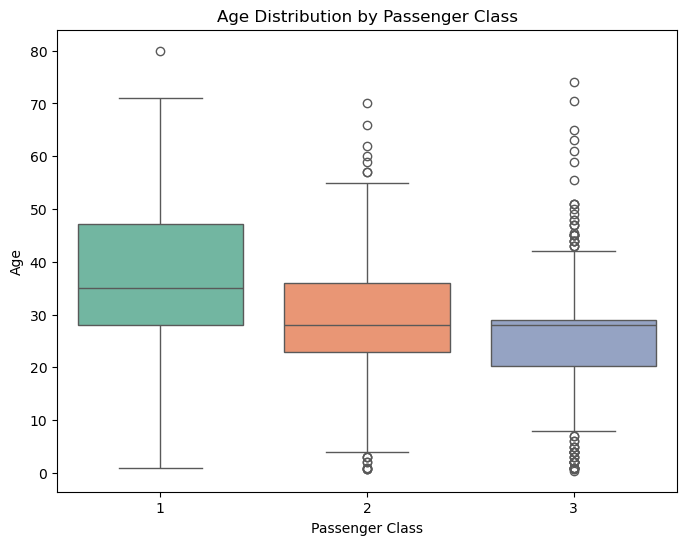

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="pclass", y="age", data=df, palette="Set2")
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

### Goal:
- Communicate data-driven insights through charts and plots.

# Task No 4

# Analyze Sales  Data Using Grouping

> Superstore Sales Dataset (a classic for sales analysis). It’s widely used in data science and business analytics projects because it has sales, profit, category, region, and customer data.

In [19]:
df = pd.read_csv("train.csv")

In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [21]:
df.shape

(9800, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [23]:
df.isna().sum()/df.shape[0]*100

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

##  For Sales Analysis

- Superstore Dataset

    - Columns: Order Date, Category, Sub-Category, Sales, Profit, Region, Segment, etc.

        - Example Grouping:

            - Sales by Region

            - Sales by Category

            - Average Sales per Customer Segment

### a. Sales by Region

In [24]:
sales_by_region = df.groupby("Region")["Sales"].sum().reset_index()
sales_by_region

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


C:\Users\Jam\AppData\Local\Temp\ipykernel_4388\302866563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Sales", data=sales_by_region, palette="viridis")


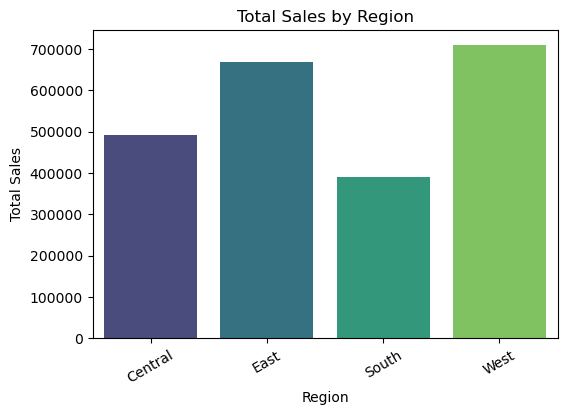

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Sales", data=sales_by_region, palette="viridis")
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.show()

- Findings Sales by Region
    - The **West Region** records the highest total sales.
    - The **South Region** shows the lowest sales contribution.

C:\Users\Jam\AppData\Local\Temp\ipykernel_4388\3136354702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Category", data=profit_by_category, palette="Blues_r")


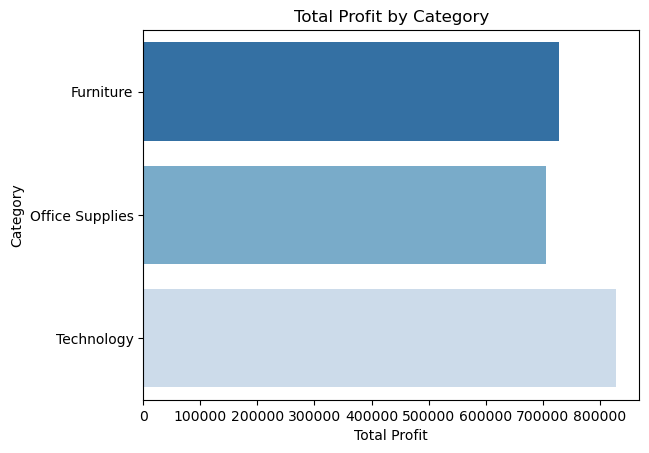

In [26]:

profit_by_category = df.groupby("Category")["Sales"].sum().reset_index()
profit_by_category

sns.barplot(x="Sales", y="Category", data=profit_by_category, palette="Blues_r")
plt.title("Total Profit by Category")
plt.xlabel("Total Profit")
plt.show()



- Findings Sales by Category
    - **Technology** leads in sales, showing strong margins.
    - **Office Supplies** has the lowest sale.

### C.  Average Sales per Customer Segment

In [27]:

avg_sales_segment = df.groupby("Segment")["Sales"].mean().reset_index()
avg_sales_segment


,Segment,Sales
0,Consumer,225.065777
1,Corporate,233.150720
2,Home Office,243.403309


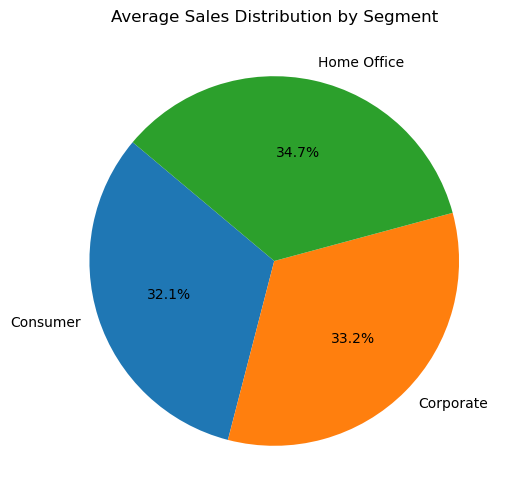

In [28]:
plt.figure(figsize=(6,6))
plt.pie(
    avg_sales_segment["Sales"], 
    labels=avg_sales_segment["Segment"], 
    autopct="%1.1f%%", 
    startangle=140
)
plt.title("Average Sales Distribution by Segment")
plt.show()

- Key Insights
    - The **West** is a strong market driver.
    - The **Technology** category has the most sales — worth investing in.

# Task No 5

> Dash Board on HR data 